In [262]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy import stats
import seaborn as sns

# File to Load (Remember to change these)
original_train_data = "/Users/fernandawolburg/Downloads/original_data_train.csv"

# Read the data
train_nba = pd.read_csv(original_train_data)

In [45]:
# Show the dataframe
train_nba.head()

,TEAM,SEASON,GP,W,L,WIN%,MIN,POSS,OPP POSS,PACE,...,OPP AST/TO,OPP STL Total,OPP STL Per 100 Poss,OPP BLK Total,OPP BLK Per 100 Poss,OPP BLKA Total,OPP BLKA Per 100 Poss,OPP PF Total,OPP PF Per 100 Poss,PLAYOFF RESULT
0,Atlanta Hawks,2009-10,82,53,29,0.646,3971,7512,7506,90.77,...,1.51,506,6.741274,359,4.782840,413,5.502265,1582,21.076472,CSF
1,Atlanta Hawks,2010-11,82,44,38,0.537,3946,7412,7426,90.22,...,1.71,548,7.379478,348,4.686238,341,4.591974,1517,20.428225,CSF
2,Atlanta Hawks,2011-12,66,40,26,0.606,3233,6118,6124,90.88,...,1.36,494,8.066623,313,5.111039,303,4.947747,1263,20.623775,R1
3,Atlanta Hawks,2012-13,82,44,38,0.537,3971,7745,7736,93.56,...,1.46,689,8.906412,350,4.524302,369,4.769907,1543,19.945708,R1
4,Atlanta Hawks,2013-14,82,38,44,0.463,3966,7895,7872,95.41,...,1.52,672,8.536585,354,4.496951,326,4.141260,1643,20.871443,R1


In [133]:
# Scrape the table of Mars facts
nba_salaries = 'https://hoopshype.com/salaries/'
tables = pd.read_html(nba_salaries)
salaries_df = tables[0]
salaries_df.columns = ['rank', 'TEAM', '2019/20', '2020/21', '2021/22', '2022/23', '2023/24', '2024/25']
# Sort by ascending team name
salaries_df = salaries_df.sort_values('TEAM')
salaries_df.head()

,rank,TEAM,2019/20,2020/21,2021/22,2022/23,2023/24,2024/25
29,30.0,Atlanta,"$108,120,710","$33,369,003","$1,782,621",$0,$0,$0
22,23.0,Boston,"$118,891,269","$122,426,100","$77,600,400","$64,415,800","$28,508,929",$0
13,14.0,Brooklyn,"$126,178,780","$131,882,315","$130,301,815","$107,900,288",$0,$0
16,17.0,Charlotte,"$124,325,442","$76,267,752","$19,687,884",$0,$0,$0
24,25.0,Chicago,"$117,090,132","$106,027,708","$45,472,621",$0,$0,$0


In [220]:
# create a dataframe for the information of the grouped teams
nba_dff = pd.DataFrame({
    "Team name": train_nba["TEAM"],
    "wins": train_nba["W"],
    "losses": train_nba["L"]
})

# Change the name of the teams: Charlotte Bobcats, New Orleans Hornets, Los Angeles Clippers, New Jersey Nets
nba_dff["Team name"]= nba_dff["Team name"].replace("Charlotte Bobcats", "Charlotte Hornets") 
nba_dff["Team name"]= nba_dff["Team name"].replace("New Orleans Hornets", "New Orleans Pelicans") 
nba_dff["Team name"]= nba_dff["Team name"].replace("Los Angeles Clippers", "LA Clippers") 
nba_dff["Team name"]= nba_dff["Team name"].replace("New Jersey Nets", "Brooklyn Nets")

In [221]:
# Group the nba_df dataframe by team name
nba_group = nba_dff.groupby('Team name')

# calculate games won and games lost
games_won = nba_group['wins'].sum()
games_lost = nba_group['losses'].sum()

# create a dataframe for the information of the grouped team, the games won, and the games lost
nba_df = pd.DataFrame({
    "Team name" : nba_group['Team name'],
    "wins": games_won,
    "losses": games_lost
})
nba_df.head()

,Team name,wins,losses
Team name,,,
Atlanta Hawks,"(Atlanta Hawks, [Atlanta Hawks, Atlanta Hawks,...",423,381
Boston Celtics,"(Boston Celtics, [Boston Celtics, Boston Celti...",456,347
Brooklyn Nets,"(Brooklyn Nets, [Brooklyn Nets, Brooklyn Nets,...",300,504
Charlotte Hornets,"(Charlotte Hornets, [Charlotte Hornets, Charlo...",341,463
Chicago Bulls,"(Chicago Bulls, [Chicago Bulls, Chicago Bulls,...",428,376


In [223]:
team_name = list(nba_dff['Team name'].unique())
wins = list(nba_df['wins'])
losses = list(nba_df['losses'])
salary = list(salaries_df['2019/20'])

In [224]:
nba_with_salaries = pd.DataFrame({
    "Team name" : team_name,
    "wins": wins,
    "losses": losses,
    "salary": salary
})
#nba_with_salaries = nba_with_salaries.drop('Team name', 1)
nba_with_salaries.head()

,Team name,wins,losses,salary
0,Atlanta Hawks,423,381,"$108,120,710"
1,Boston Celtics,456,347,"$118,891,269"
2,Brooklyn Nets,300,504,"$126,178,780"
3,Charlotte Hornets,341,463,"$124,325,442"
4,Chicago Bulls,428,376,"$117,090,132"


In [225]:
nba_with_salaries.dtypes

Team name    object
wins          int64
losses        int64
salary       object
dtype: object

In [226]:
# create a new column that has salary as an INT for scatterplot use
nba_with_salaries['INT salary'] = nba_with_salaries['salary'].str.replace(',', '')
nba_with_salaries['INT salary'] = nba_with_salaries['INT salary'].str.replace('$', '')
nba_with_salaries['INT salary'] = nba_with_salaries['INT salary'].astype(int)
nba_with_salaries.head()

,Team name,wins,losses,salary,INT salary
0,Atlanta Hawks,423,381,"$108,120,710",108120710
1,Boston Celtics,456,347,"$118,891,269",118891269
2,Brooklyn Nets,300,504,"$126,178,780",126178780
3,Charlotte Hornets,341,463,"$124,325,442",124325442
4,Chicago Bulls,428,376,"$117,090,132",117090132


In [227]:
nba_with_salaries.dtypes

Team name     object
wins           int64
losses         int64
salary        object
INT salary     int64
dtype: object

In [251]:
salaries_int = list(nba_with_salaries['INT salary'])

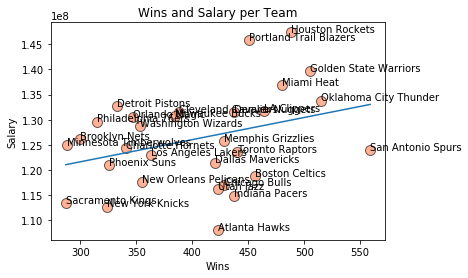

In [286]:
# x and y labels
x = nba_with_salaries['wins']
y = nba_with_salaries['INT salary']
z = nba_with_salaries['Team name']

# create scatter plot
plt.scatter(x, y, s=100,
            color = 'coral', edgecolor = 'black', label = 'Urban', alpha = .60, linewidth=1)

# add labels and show plot
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.title('Wins and Salary per Team')
plt.xlabel('Wins')
plt.ylabel('Salary')

for i, txt in enumerate(z):
    plt.annotate(txt, (x[i], y[i]))
    
plt.show()

In [187]:
linregress(x,y)

LinregressResult(slope=43981.226244676865, intercept=108454724.19051471, rvalue=0.33839219958022276, pvalue=0.06738761622284649, stderr=23113.19490876743)